In [6]:
# Kennedi Todd
# August 8, 2024
# Chapter 12: k-Nearest Neighbor
# use kNN to predict outcome of user clicking on ad

# libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# read data
df = pd.read_csv('advertising.csv')
df.shape

(1000, 10)

In [7]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
# remove vars
del df['Ad Topic Line']
del df['Timestamp']
del df['Male']
del df['City']
del df['Country']
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


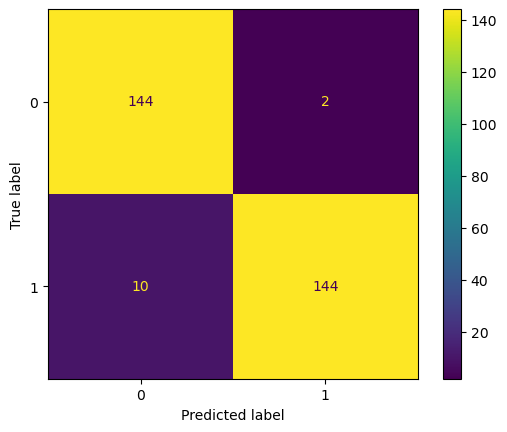

In [14]:
# scale data
scaler = StandardScaler()
scaler.fit(df.drop('Clicked on Ad', axis = 1))
scaled_features = scaler.transform(df.drop('Clicked on Ad', axis = 1))

# set X and y values
X = scaled_features
y = df['Clicked on Ad']

# split data 70/30 into training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 10)

# set algorithm
model = KNeighborsClassifier(n_neighbors = 5)

# fit data to model
model.fit(X_train, y_train)

# evaluate
model_predict = model.predict(X_test)
cf = confusion_matrix(y_test, model_predict)
cf_plot = ConfusionMatrixDisplay(cf)
cf_plot.plot()

In [15]:
# 144 correct negatives
# 2 false-positives
# 10 false-negatives
# 144 correct positives

print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.99      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



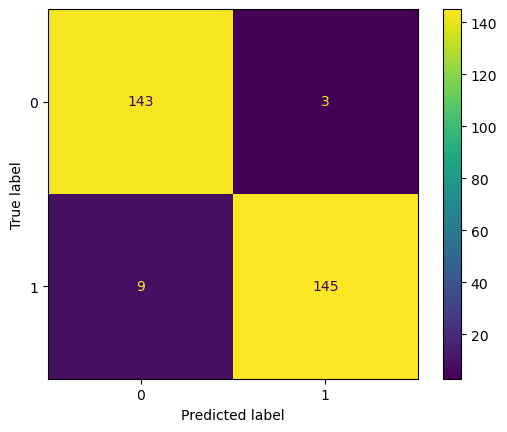

In [16]:
# optimize
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
model_predict = model.predict(X_test)
cf = confusion_matrix(y_test, model_predict)
cf_plot = ConfusionMatrixDisplay(cf)
cf_plot.plot()

In [17]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       146
           1       0.98      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [18]:
model.predict(scaled_features)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [19]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0
5,59.99,23,59761.56,226.74,0
6,88.91,33,53852.85,208.36,0
7,66.00,48,24593.33,131.76,1
8,74.53,30,68862.00,221.51,0
9,69.88,20,55642.32,183.82,0
